In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/zomato-restaurants-dataset-for-metropolitan-areas/zomato_dataset.csv


# ****Data Processing

In [2]:
data = '/kaggle/input/zomato-restaurants-dataset-for-metropolitan-areas/zomato_dataset.csv'

zm= pd.read_csv(data)

In [3]:
zm.head(20)

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0
5,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Pizza [8 inches],BESTSELLER,48,199.0
6,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Zinger Tortilla Wrap,CHEF'S SPECIAL,27,165.0
7,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Popcorn [20 Pieces],BESTSELLER,59,165.0
8,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Sandwich,NaN,29,115.0
9,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Bread Samoli Shawarma,NaN,31,129.0


# ****Null Values

In [4]:
zm.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [5]:
relation=zm.corr()
relation

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
Dining Rating,1.000000,0.311651,0.229514,-0.138843,0.040707,0.074197
Delivery Rating,0.311651,1.000000,0.132089,-0.065398,0.049216,0.054198
Dining Votes,0.229514,0.132089,1.000000,-0.244525,0.007271,0.016136
Delivery Votes,-0.138843,-0.065398,-0.244525,1.000000,-0.063766,0.007060
Votes,0.040707,0.049216,0.007271,-0.063766,1.000000,-0.058036
Prices,0.074197,0.054198,0.016136,0.007060,-0.058036,1.000000


# ****EDA

# Correlation of features

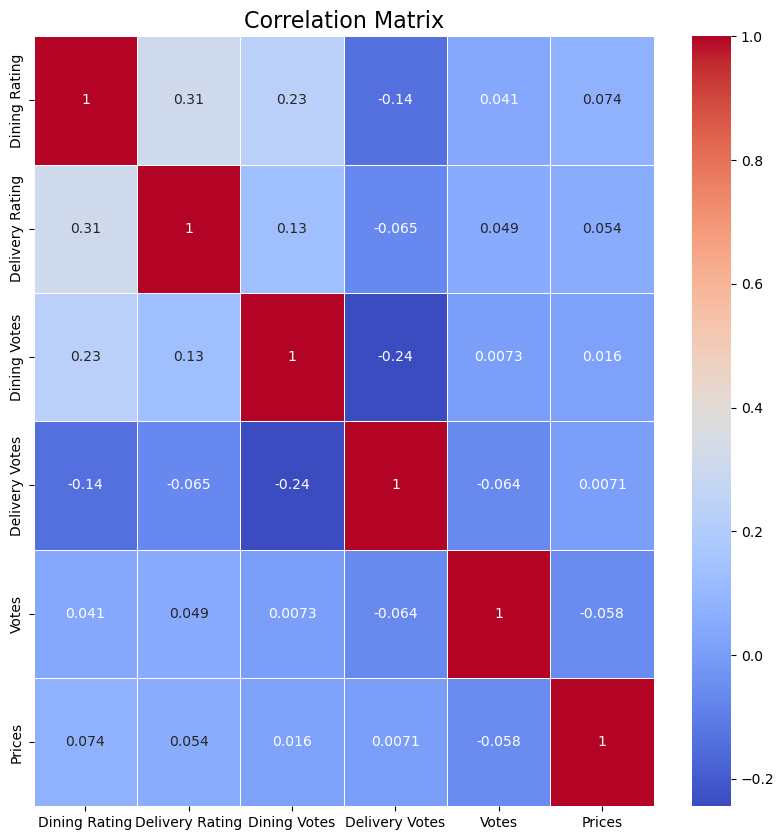

In [6]:
plt.figure(figsize=(10, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(relation, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title and axis labels
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

# Relation of City with features

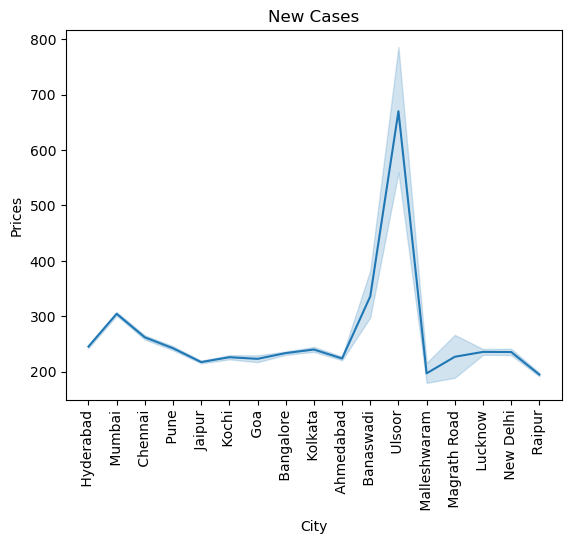

In [7]:

sns.lineplot(x='City', y='Prices', data=zm,)
plt.title('New Cases')
plt.xticks(rotation=90)
plt.show()


# Location/City Count

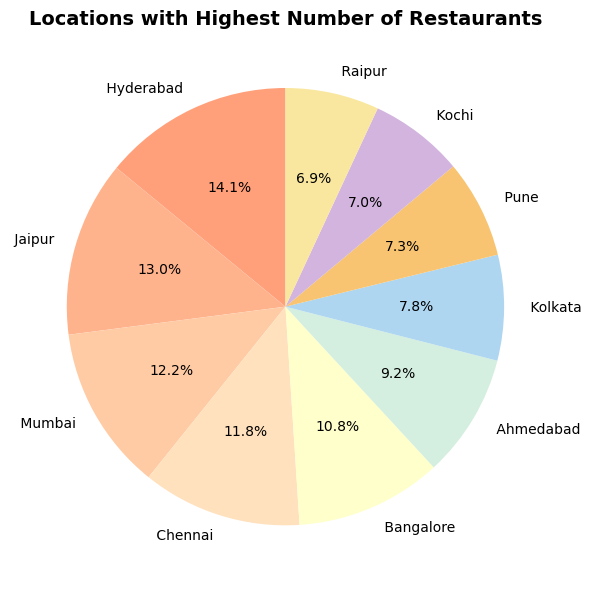

In [8]:
location_counts = zm['City'].value_counts().head(10)
colors = ['#FFA07A', '#FFB38D', '#FFCBA4', '#FFE1BD', '#FFFFCC', '#D4EFDF', '#AED6F1', '#F8C471', '#D2B4DE', '#F9E79F']

plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90,colors = colors)

plt.title('Locations with Highest Number of Restaurants', fontsize=14, weight = 'bold')

plt.tight_layout()
plt.show()

# Dining Ratio

In [9]:
zomato_filter=zm.dropna(subset=['Dining Rating'])
print(zomato_filter.shape)
zomato_filter.isnull().sum()

(91421, 12)


Restaurant Name        0
Dining Rating          0
Delivery Rating       61
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        71193
Votes                  0
Prices                 0
dtype: int64

In [10]:
zomato_filter['Dining Rating'].mean()

3.8222640312400866

Text(0.5, 1.0, 'Name vs Number of Restaurant')

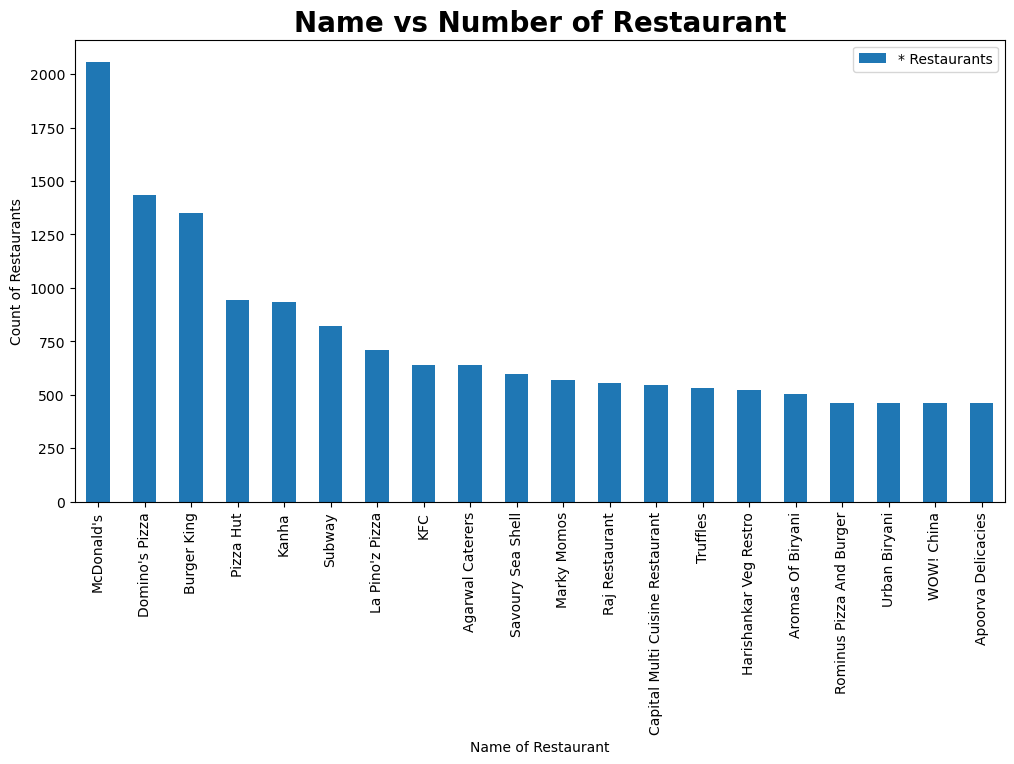

In [11]:
plt.figure(figsize = (12,6))
ax = zomato_filter['Restaurant Name'].value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

# Which city has more resturants

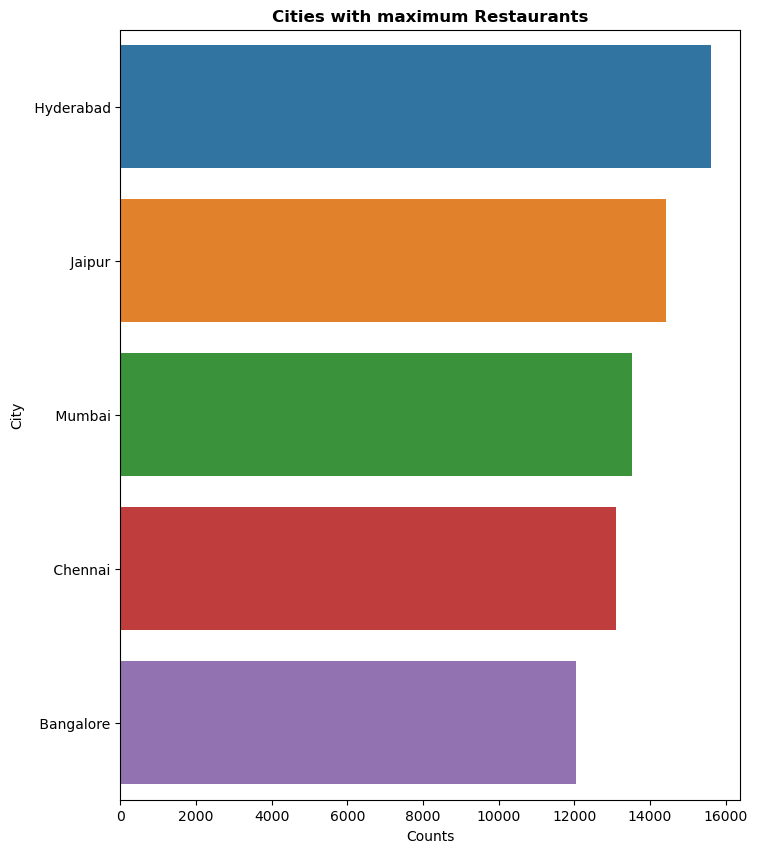

In [12]:
city_max_Res = zm['City'].value_counts().nlargest(5)

plt.figure(figsize=(8, 10))
sns.barplot(x=city_max_Res.values, y=city_max_Res.index)
plt.title('Cities with maximum Restaurants', weight = 'bold')
plt.xlabel('Counts')
plt.ylabel('City')
plt.show()

# Popularity of items

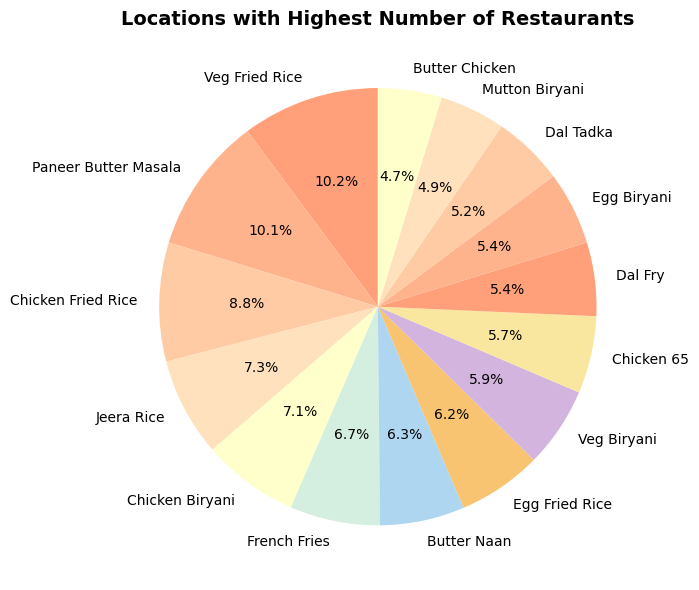

In [13]:
location_counts = zm['Item Name'].value_counts().head(15)
colors = ['#FFA07A', '#FFB38D', '#FFCBA4', '#FFE1BD', '#FFFFCC', '#D4EFDF', '#AED6F1', '#F8C471', '#D2B4DE', '#F9E79F']

plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90,colors = colors)

plt.title('Locations with Highest Number of Restaurants', fontsize=14, weight = 'bold')

plt.tight_layout()
plt.show()

# Dining Rating

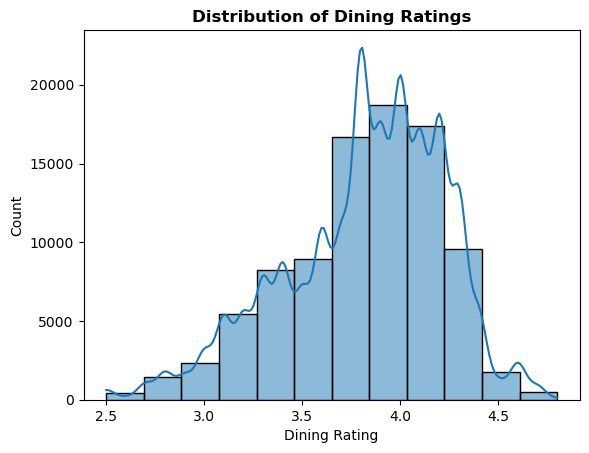

In [14]:
sns.histplot(zm['Dining Rating'], bins=12, kde=True)
plt.title('Distribution of Dining Ratings', weight = 'bold')
plt.show()

# Relation of Delivery Rating with prices

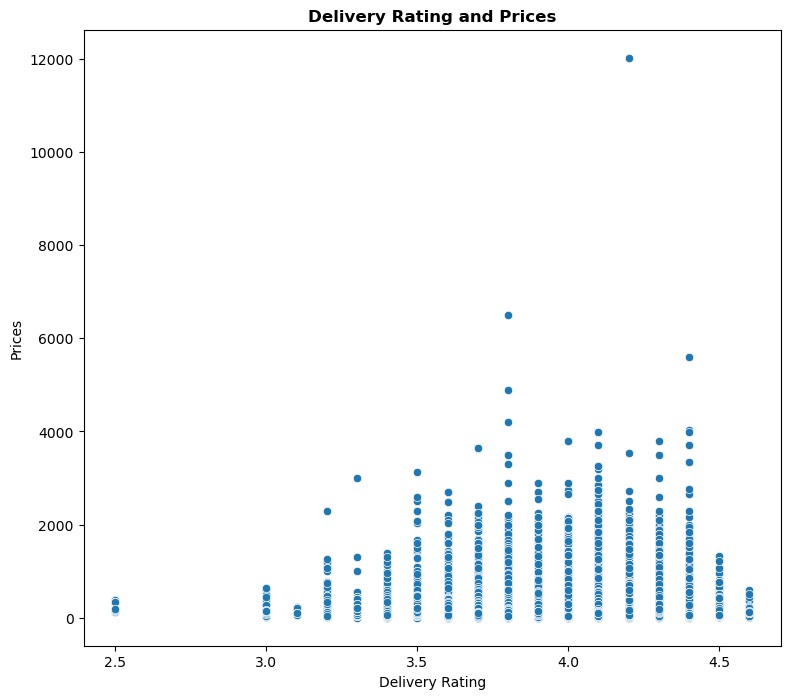

In [15]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x='Delivery Rating', y='Prices', data=zm)
plt.title('Delivery Rating and Prices', weight = 'bold')
plt.xlabel('Delivery Rating')
plt.ylabel('Prices')
plt.show()

# Top Restaurants in Each City and Their Best Cuisines

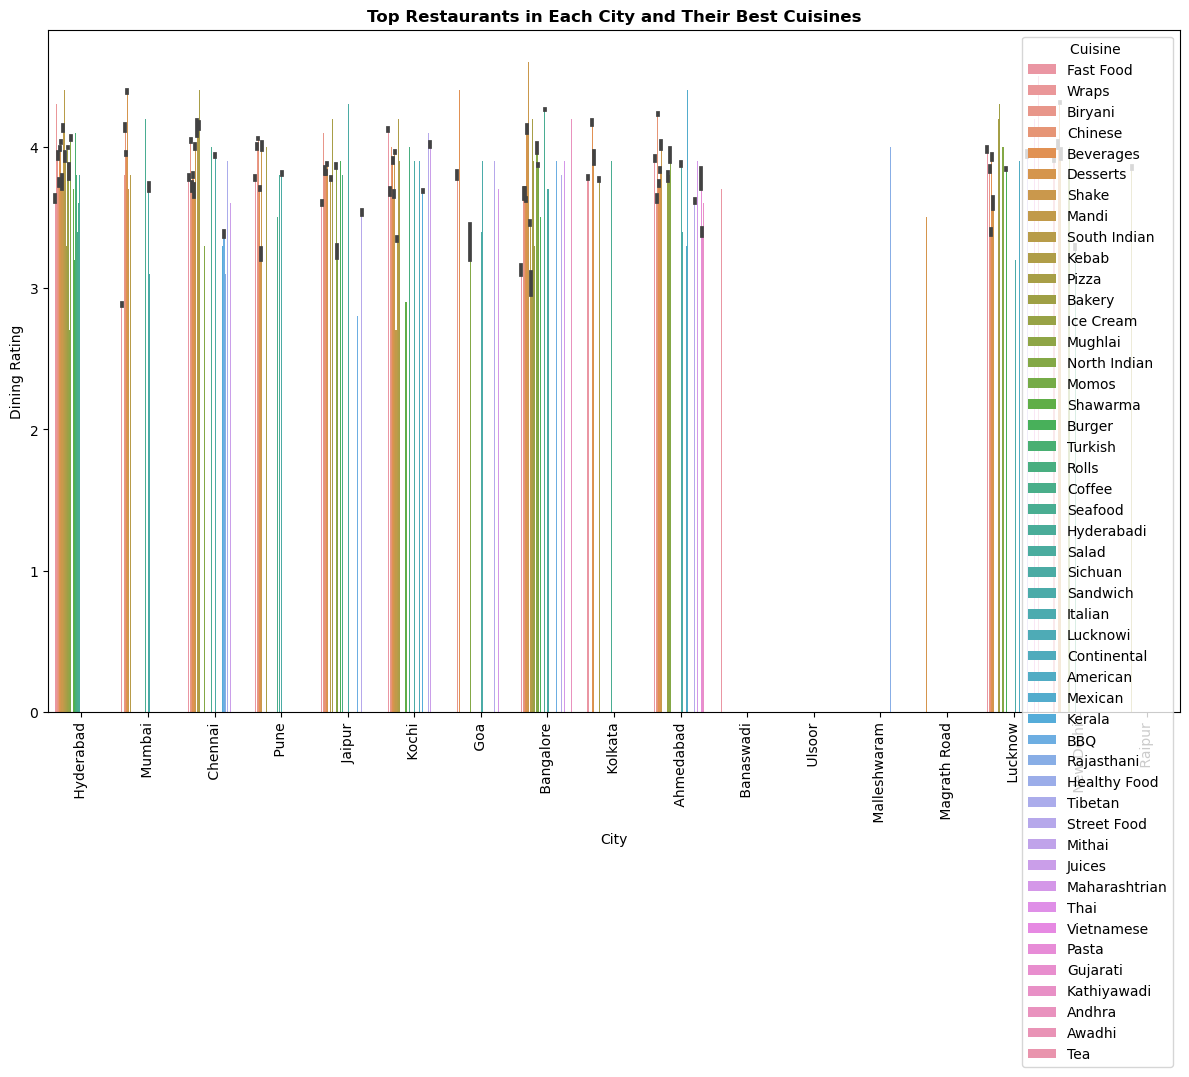

In [16]:
plt.figure(figsize=(12, 10))
sns.barplot(x='City', y='Dining Rating', hue='Cuisine ', data=zm)
plt.xlabel('City')
plt.ylabel('Dining Rating')
plt.title('Top Restaurants in Each City and Their Best Cuisines', weight = 'bold')
plt.xticks(rotation=90)
plt.legend(title='Cuisine ')
plt.tight_layout()
plt.show()

# Which cuisine has how much resturant

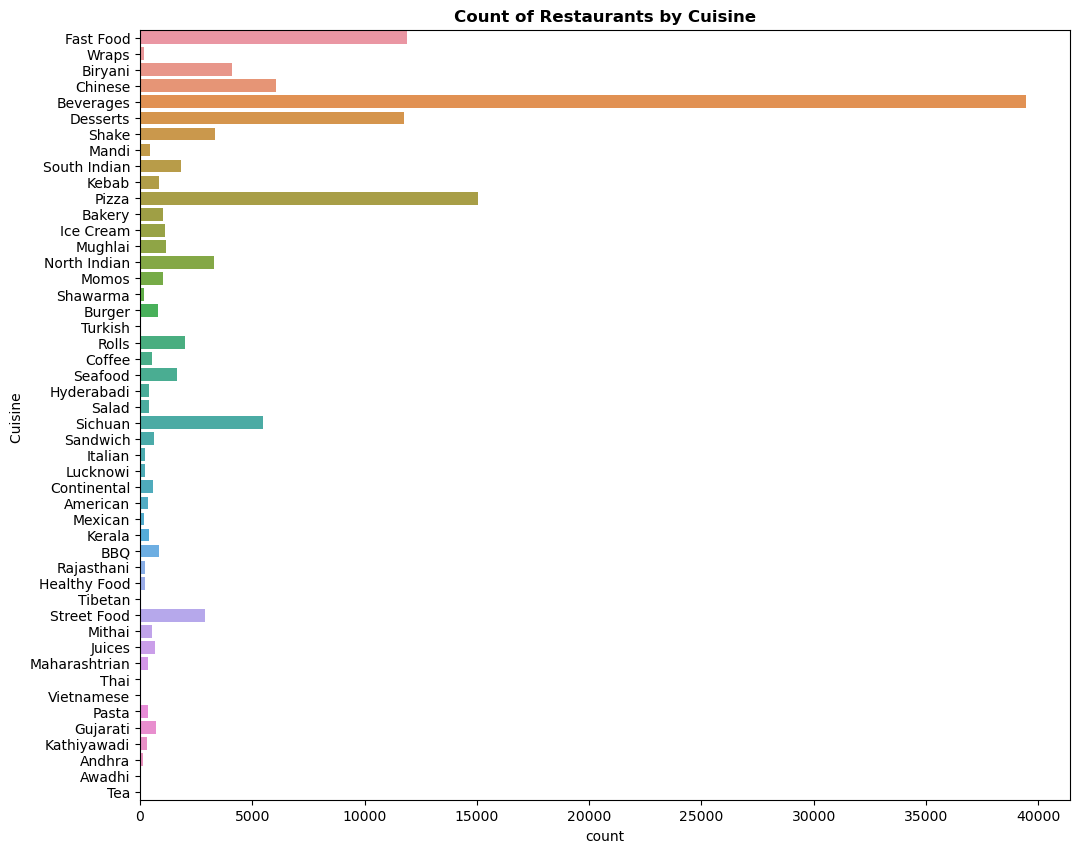

In [17]:
plt.figure(figsize=(12, 10))
sns.countplot(data=zm, y='Cuisine ')
plt.title('Count of Restaurants by Cuisine', weight = 'bold')
plt.show()

# # Relation between Dining Rating And Prices (is dependent)

Text(0.5, 1.0, 'Dining Rating vs Prices')

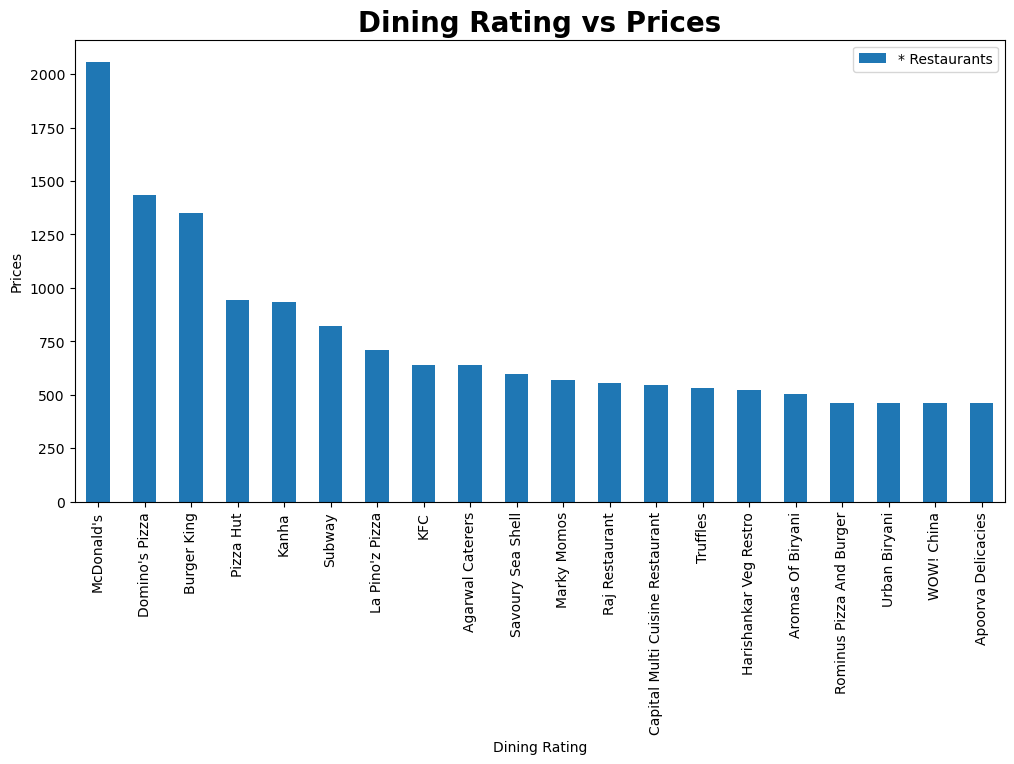

In [18]:
plt.figure(figsize = (12,6))
ax = zomato_filter['Restaurant Name'].value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Dining Rating")
plt.ylabel("Prices")
plt.title("Dining Rating vs Prices",fontsize =20, weight = 'bold')